In [2]:
%matplotlib inline
import pandas as pd
import seaborn as sns
from collections import Counter
from pmareport import pmareport
import numpy as np
import matplotlib.pyplot as plt
import calendar

In [3]:
clinic = pmareport.Clinic()
df = clinic.df

In [4]:
df.head()

,PATIENT_ID,PATIENT_CONDITION,INSURANCE_TYPE,AGE,SEX,PROVIDER_NAME,date,sched,start,end,...,month,num_appts,appt_pos_overall,appt_pos_doctor,cond,schedd,startd,endd,arrived,since_prev_sched
0,4591553,Uncommon Cold,BlueSword/BlueDiamond,31,M,L. Jedermann,2005-01-03,1900-01-01 07:59:00,1900-01-01 08:07:00,1900-01-01 08:22:00,...,1,16,0,0,uc,479,487,502,475,NaN
1,4607440,TV Personality Disorder,Medifix,48,F,I. Petrov,2005-01-03,1900-01-01 08:15:00,1900-01-01 08:18:00,1900-01-01 08:53:00,...,1,16,1,0,tvp,495,498,533,495,NaN
2,4590430,TV Personality Disorder,Medifix,42,M,E. Medelsvensson,2005-01-03,1900-01-01 08:30:00,1900-01-01 08:42:00,1900-01-01 09:17:00,...,1,16,2,0,tvp,510,522,557,506,NaN
3,4619481,Saturday Night Fever,Self Insured,22,M,J. Smith,2005-01-03,1900-01-01 09:00:00,1900-01-01 09:11:00,1900-01-01 09:39:00,...,1,16,3,0,snf,540,551,579,543,NaN
4,4610862,Uncommon Cold,Self Insured,32,M,L. Jedermann,2005-01-03,1900-01-01 10:00:00,1900-01-01 10:00:00,1900-01-01 10:16:00,...,1,16,4,1,uc,600,600,616,596,121


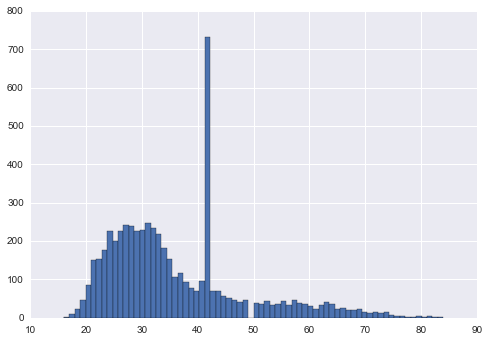

In [5]:
# Interesting plot
df.AGE.hist(bins=70)

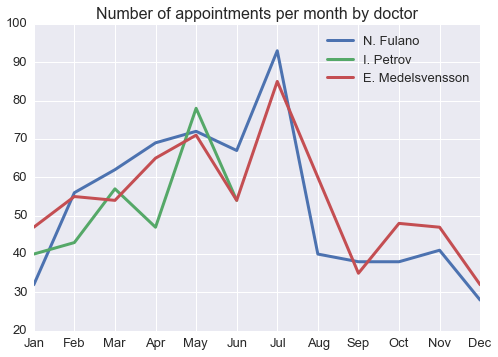

In [35]:
# Nmber of appointments plot
df_month_doc = df.groupby(['month', 'PROVIDER_NAME'])
df_month_doc_cnt = df_month_doc.count()
for i in list(set(df[df.cond == 'tvp'].PROVIDER_NAME)):
    #plt.clf()
    data = df_month_doc_cnt.xs(i, level='PROVIDER_NAME')
    plt.plot(data.index, data.PATIENT_ID, label=i, linewidth=3)
plt.xticks(xrange(0, 13), calendar.month_abbr, size=13)
plt.xlim(xmin=1)
plt.yticks(size=13)
plt.title('Number of appointments per month by doctor', size=16)
plt.legend(fontsize=13)
plt.savefig('appts_per_month_doc_tpd2.png', bbox='tight', dpi=300)

In [7]:
df[df.cond == 'tvp'].groupby(['PROVIDER_NAME', 'month']).count()

PATIENT_ID  PATIENT_CONDITION  INSURANCE_TYPE  AGE  \
PROVIDER_NAME    month                                                       
E. Medelsvensson 1              47                 47              47   47   
                 2              55                 55              55   55   
                 3              54                 54              54   54   
                 4              65                 65              65   65   
                 5              71                 71              71   71   
                 6              54                 54              54   54   
                 7              85                 85              85   85   
                 8              60                 60              60   60   
                 9              35                 35              35   35   
                 10             48                 48              48   48   
                 11             47                 47              47   47   
                 12             32                 32              32   32   
I. Petrov        1              40                 40              40   40   
                 2              43                 43              43   43   
                 3              57                 57              57   57   
                 4              47                 47              47   47   
                 5              78                 78              78   78   
                 6              54                 54              54   54   
N. Fulano        1              32                 32              32   32   
                 2              56                 56              56   56   
                 3              62                 62              62   62   
                 4              69                 69              69   69   
                 5              72                 72              72   72   
                 6              67                 67              67   67   
                 7              93                 93              93   93   
                 8              40                 40              40   40   
                 9              38                 38              38   38   
                 10             38                 38              38   38   
                 11             41                 41              41   41   
                 12             28                 28              28   28   

                        SEX  date  sched  start  end  arrive  \
PROVIDER_NAME    month                                         
E. Medelsvensson 1       47    47     47     47   47      47   
                 2       55    55     55     55   55      55   
                 3       54    54     54     54   54      54   
                 4       65    65     65     65   65      65   
                 5       71    71     71     71   71      71   
                 6       54    54     54     54   54      54   
                 7       85    85     85     85   85      85   
                 8       60    60     60     60   60      60   
                 9       35    35     35     35   35      35   
                 10      48    48     48     48   48      48   
                 11      47    47     47     47   47      47   
                 12      32    32     32     32   32      32   
I. Petrov        1       40    40     40     40   40      40   
                 2       43    43     43     43   43      43   
                 3       57    57     57     57   57      57   
                 4       47    47     47     47   47      47   
                 5       78    78     78     78   78      78   
                 6       54    54     54     54   54      54   
N. Fulano        1       32    32     32     32   32      32   
                 2       56    56     56     56   56      56   
                 3       62    62     62     62   62      62   
                 4       69    69     69     69   69   

In [8]:
def change(a, b):
    return (b-a)/float(a)

In [9]:
change(54, 85), change(67, 93)

(0.5740740740740741, 0.3880597014925373)

In [10]:
set(df.PROVIDER_NAME)

{'C. Siu Ming',
 'E. Medelsvensson',
 'I. Petrov',
 'J. Smith',
 'K. van der Merwe',
 'L. Jedermann',
 'M. Dupont',
 'N. Fulano',
 'W. Plinge'}

In [11]:
df.groupby(['PROVIDER_NAME', 'PATIENT_CONDITION']).count().PATIENT_ID

PROVIDER_NAME     PATIENT_CONDITION      
C. Siu Ming       Uncommon Cold              461
E. Medelsvensson  TV Personality Disorder    653
I. Petrov         TV Personality Disorder    319
J. Smith          Saturday Night Fever       903
K. van der Merwe  Saturday Night Fever       871
L. Jedermann      Uncommon Cold              481
M. Dupont         Uncommon Cold              492
N. Fulano         TV Personality Disorder    636
W. Plinge         Saturday Night Fever       890
Name: PATIENT_ID, dtype: int64

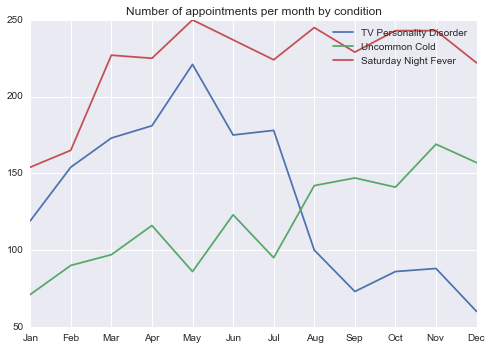

In [15]:
# number of appointments by condition plot
df_month_cond = df.groupby(['month', 'PATIENT_CONDITION'])
df_month_cond_cnt = df_month_cond.count()
for i in set(df.PATIENT_CONDITION):
    #plt.clf()
    data = df_month_cond_cnt.xs(i, level='PATIENT_CONDITION')
    plt.plot(xrange(1,13), data.PATIENT_ID, label=i)
    plt.xticks(xrange(0, 13), calendar.month_abbr)
    plt.xlim(xmin=1)
plt.title('Number of appointments per month by condition')
plt.legend()
plt.savefig('appts_per_month_cond2.png', bbox='tight', dpi=200)

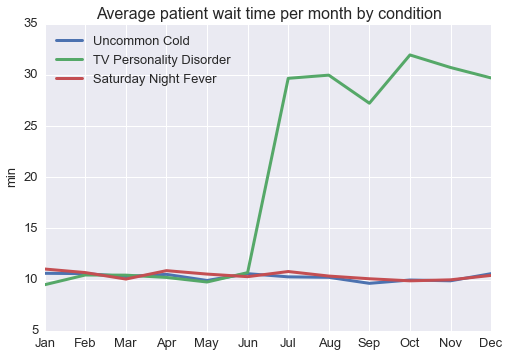

In [29]:
# Average delay per month by condition
df_month_cond_mean = df.groupby(['month', 'PATIENT_CONDITION']).mean()
for i in ['Uncommon Cold', 'TV Personality Disorder', 'Saturday Night Fever']:
    #plt.clf()
    data = df_month_cond_mean.xs(i, level='PATIENT_CONDITION')
    plt.plot(data.index, data.delay, label=i, linewidth=3)
    plt.xticks(xrange(0, 13), calendar.month_abbr, size=13)
    plt.yticks(size=13)
    plt.xlim(xmin=1)
plt.title('Average patient wait time per month by condition', fontsize=16)
plt.ylabel('min', fontsize=13)
plt.legend(loc=2, fontsize=13)
plt.savefig('delay_per_month_cond.png', bbox='tight', dpi=300)